In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [30]:
dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()

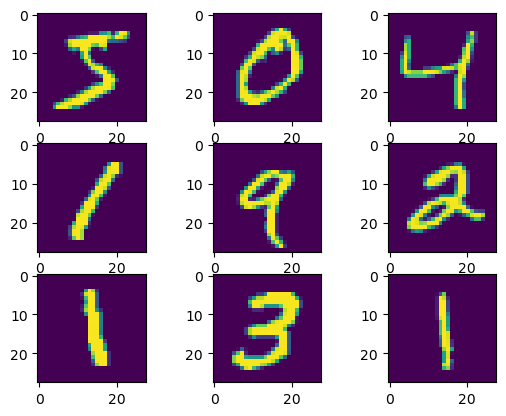

In [31]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])

In [32]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [33]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [69]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1), name = 'Layer1'),
        MaxPooling2D((2,2), name = 'Layer2'),
        Dropout(0.1, name = 'Layer3'),
        Conv2D(64, (3,3), activation = 'relu', name = 'Layer4'),
        MaxPooling2D((2,2), name = 'Layer5'),
        Dropout(0.1, name = 'Layer6'),
        Conv2D(64, (3,3), activation = 'relu', name = 'Layer7'),
        Flatten(name = 'Layer8'),
        Dense(64, activation = 'relu', name = 'Layer9'),
        Dense(10, activation = 'linear', name = 'Layer10') #Softmax Layer (Better Implementation Using from_logits)
    ]
)

In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 Layer2 (MaxPooling2D)       (None, 13, 13, 32)        0         
                                                                 
 Layer3 (Dropout)            (None, 13, 13, 32)        0         
                                                                 
 Layer4 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 Layer5 (MaxPooling2D)       (None, 5, 5, 64)          0         
                                                                 
 Layer6 (Dropout)            (None, 5, 5, 64)          0         
                                                                 
 Layer7 (Conv2D)             (None, 3, 3, 64)         

In [71]:
model.compile(
     loss = SparseCategoricalCrossentropy(from_logits = True),
     optimizer = Adam(10e-3),
     metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1833 - accuracy: 0.9439
Epoch 2/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0954 - accuracy: 0.9717
Epoch 3/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0945 - accuracy: 0.9728
Epoch 4/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0911 - accuracy: 0.9746
Epoch 5/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0878 - accuracy: 0.9755
Epoch 6/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0842 - accuracy: 0.9774
Epoch 7/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0851 - accuracy: 0.9775
Epoch 8/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0766 - accuracy: 0.9798
Epoch 9/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0876 - accuracy: 0.9775
Epoch 10/10
938/938 [==============================] - 21s 22ms/step - loss: 0.083

In [72]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.0877 - accuracy: 0.9792
[0.0876515656709671, 0.979200005531311]


313/313 [==============================] - 2s 6ms/step
7


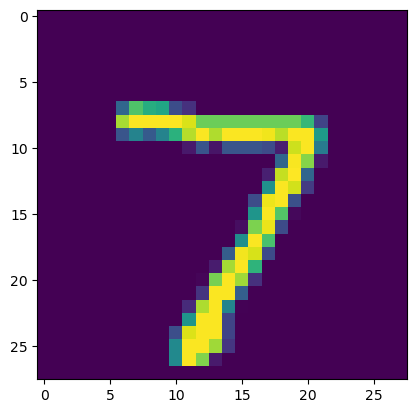

In [73]:
plt.imshow(x_test[0])
prediction = model.predict(x_test)
print(np.argmax(prediction[0]))

1/1 [==============================] - 0s 31ms/step
This digit is : 0


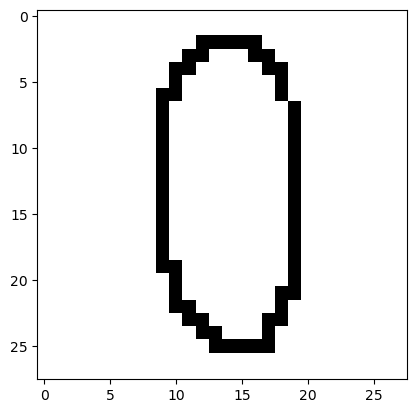

1/1 [==============================] - 0s 29ms/step
This digit is : 1


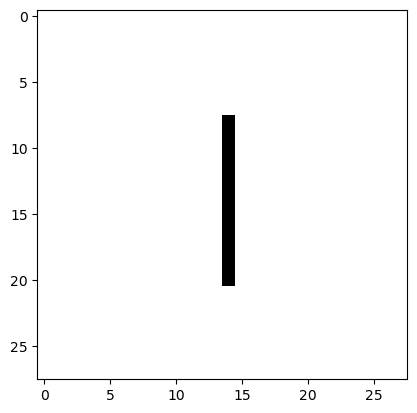

1/1 [==============================] - 0s 24ms/step
This digit is : 2


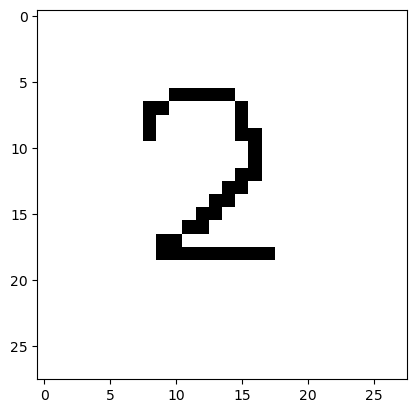

1/1 [==============================] - 0s 24ms/step
This digit is : 3


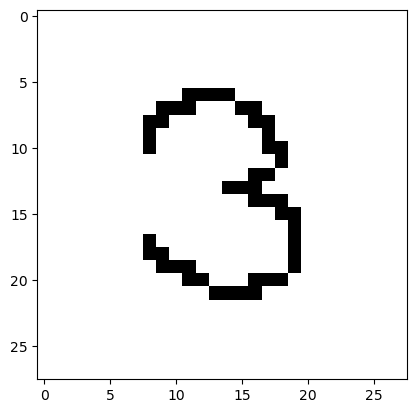

1/1 [==============================] - 0s 24ms/step
This digit is : 4


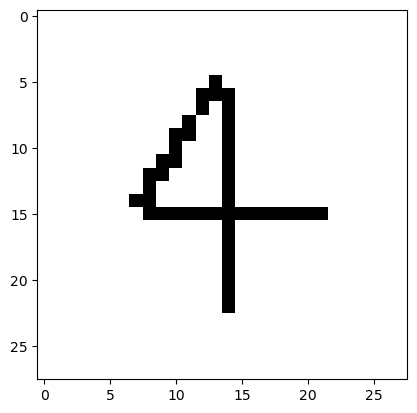

1/1 [==============================] - 0s 24ms/step
This digit is : 5


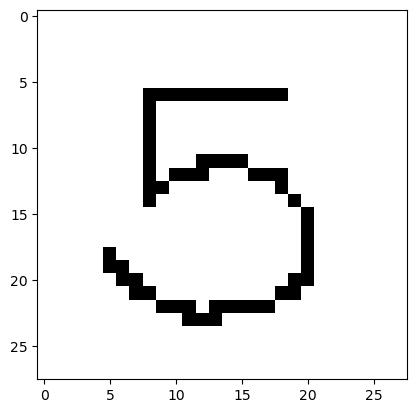

1/1 [==============================] - 0s 24ms/step
This digit is : 6


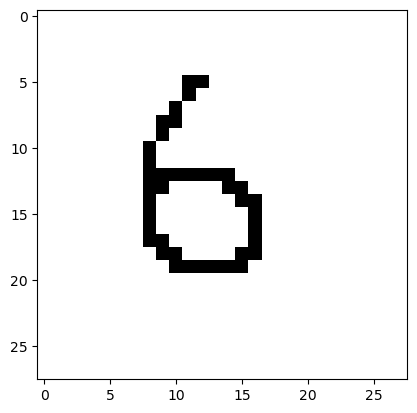

1/1 [==============================] - 0s 36ms/step
This digit is : 7


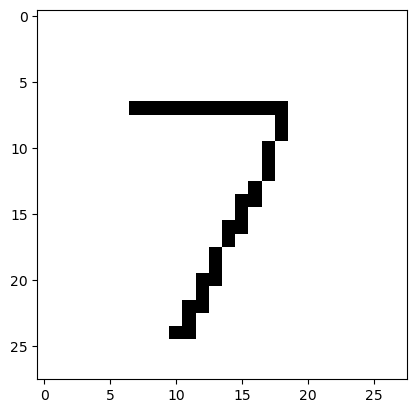

1/1 [==============================] - 0s 23ms/step
This digit is : 8


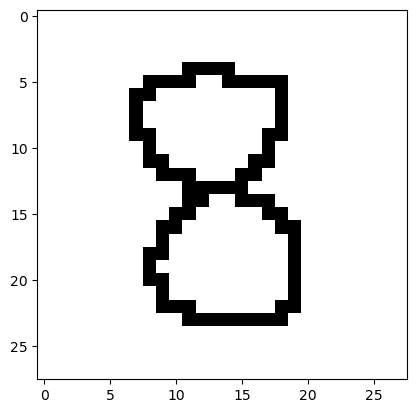

1/1 [==============================] - 0s 24ms/step
This digit is : 9


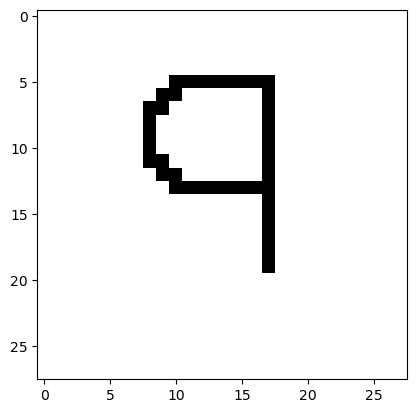

In [75]:
image_no = 0
while os.path.isfile(f"digits/digit{image_no}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_no}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is : {np.argmax(prediction)}")
        plt.imshow(img[0], cmap = 'binary')
        plt.show()
    except:
        print("Error :(")
    finally:
        image_no += 1